<a href="https://colab.research.google.com/github/priyaa1901/Sales-Forecasting-with-SHAP-Random-Forest/blob/main/Sales_Forecasting_with_SHAP_%26_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import shap
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load the dataset
data = pd.read_csv('/content/train.csv')

# Drop irrelevant columns
columns_to_drop = ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name',
                   'Country', 'City', 'Postal Code', 'Product ID', 'Product Name']
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop('Sales', axis=1)
y = data_encoded['Sales']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 784.2064394512341


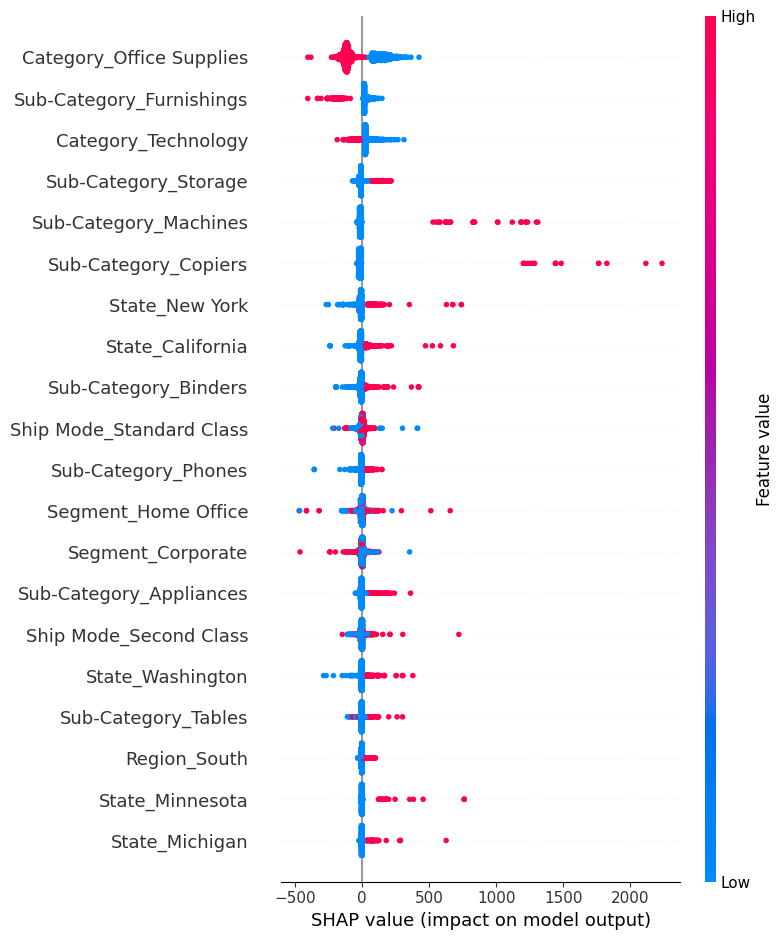

In [ ]:
# Instead of using shap.ExactExplainer, use shap.TreeExplainer:
explainer = shap.TreeExplainer(rf_model)  # Use TreeExplainer for Random Forests
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)

In [ ]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [ ]:
# Convert SHAP values to Explanation object
shap_values_expl = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test, feature_names=X_test.columns)

# Beeswarm Plot
shap.plots.beeswarm(shap_values_expl)

NameError: name 'shap' is not defined

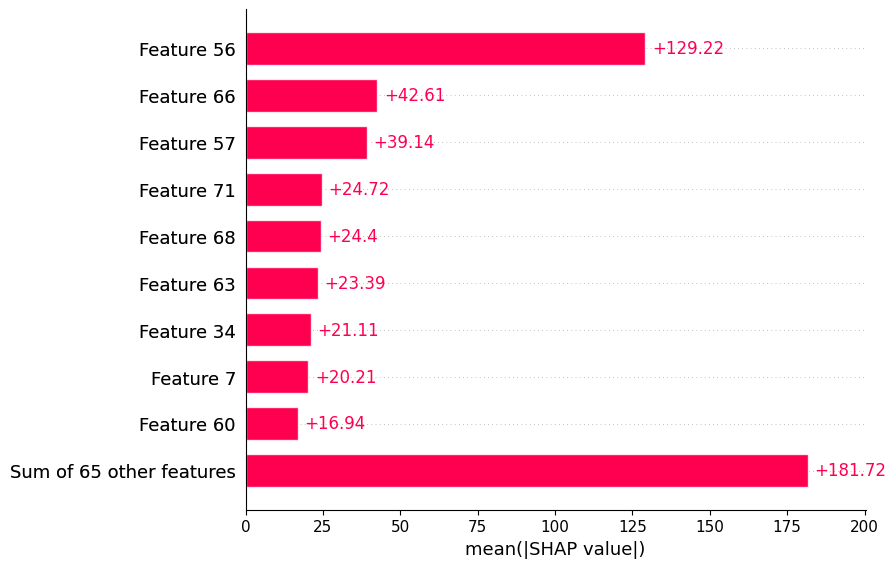

In [ ]:
# Convert shap_values to an Explanation object
shap_values_expl = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test)

# Bar plot for feature importance
shap.plots.bar(shap_values_expl)
